# NLP
---
Note a lot of my rsearch and code was derived from the work Lily Wu blogged about.

https://towardsdatascience.com/clustering-product-names-with-python-part-1-f9418f8705c8

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Libraries for preprocessing
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from sklearn.preprocessing import StandardScaler

#Libraries for vectorisation
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV

In [2]:
threads = pd.read_csv("../data/threads_for_nlp.csv")
nlp = spacy.load('en_core_web_sm')
stopwords = nlp.Defaults.stop_words

In [3]:
add_words = {'600k', '401', '308', '229', '351', '1561', '20th', '2612', '344', '3pm', '85k', '156', '45', '89', '300k', '10pts', '2649', '3k', '39', '114', '24th', '888', 'iel', '70ish', '466', '100km', '714', '054', '937x473', '12226', '10yrs', '174', '172', '747', '76', '3pt', '10k', '2nd', '15x', '62', '24k', '02', '34yr', '3400', '151', '6303790', '70th', '315', '4p', '51st', '142000', '31', '32pt', '7mt', '5y', '10gal', '1080ti', '150m', '1762', '899', '3yo', '28', '150', '430', '28f', '9826', '15k', '2207', '400lbs', '100', '1500', '828', '86', '23rd', '26f', '000488281', '3000kwh', '36', '775', '600x726', '181', '213', '100k', '343', '472', '128tick', '4000rpm', '165lbs', '242', '240', '25f', '5k', '5500', '24f', '93k', '278', '24h', 'hmmm', '583', '80', '65th', '2so', '10ast', '288', '100mph', '9th', 'maybe', '800', '795', '144', '8th', '51', '000', '0005', '105', '1777x2003', '335i', '404', '800x513', '_unsourced', '400', '666', '29f', '944', '60', '904', '368', '535', '30h', '441', '100x', '14', '925', '250', '88', '475', '010', '544', '81', '4k', '91', '272', '391', '165', '7000', '70', '96', '550', '742x1187', '3yrs', '1280x957', '95', '30th', '100mbps', '2lb', '4th', '226', '520', '1190x1346', '700', '25mil', '5bn', '20f', '3060', '34', '41', '13yo', '60612', '117', '9gag', '4ever', '103', '160k', '56', '38', '2093', '6062', '981', '3287', '869', '807', '66', '5blk', '44', '7th', '30s', '104', '936', '625', '59', '794', '227', '77', '22f', '350k', '79', '69th', '1492', '266k', '364', '224', '2002000x1333 208', '140', '600x918', '582', '750', '2x', '72k', '315x500', '8lbs', '5e', '142', '16ppg', '445', '287', '2fort', '43', '5mom', '12th', '812', '7up', '911', '314', '3990x', '787', '850', '110', '500', '1800', '725', '1024x768', '530', '10c', '555', '1440p', '37', '405', '11ppg', '5a', '1700', '865', '08', '90', '2meirl4meirl', '1o1', '324', '23y', '582b', '1600', '1459', '137', '770', '97', '763', '1757', '60m', '67', '6th', '780', '100000', '11rb', '4240x2832', '2d', '23x', '98', '10024', '118km', '29', '264', '75k', '9k', '143', '46f', '3s', '21yo', '1x', '230', '15th', '3000', '28yo', '31st', '101st', '78', '2h', '22', '259', '11ast', '10yr', '8k', '65', '992', '6500', '78436735', '7x', '180', '30pm', '127k', '20', '155', '1200x1787', '2500', '21', '58', '71', '004', '420', '32f', '977x1200', '111', '36h', '64', '2k', '33', '40y', '516', '270lbs', '168', '358', '630', '1036', '136', '23', '407', '46', '502nd', '3w', '4c', '耳をすませば', '220101', '37c', '0300hrs', '18', '69', '349', '52', '283', '4yo', '35', '1700s', '1001', '75hz', '874', '119', '713', '20am', '23f', '013', '504', '299', '135', '176', '290', '梁巨爽', '03', '280', '6700xt', '880', '1000usd', '73', '1176', '92', '76er', '55', '809', '360', '134', '139', '757x800', '5th', '5800x3d', '1450', 'oh', '914', '11rebs', '3rd', '5hours', '16', '2536', '26', 'tho', '8pm', '1300x', '3800', '9999', '1503', '55k', '161', '25', '10000', '3ds', '133', '160', '184', '350', '745', '800x532', '10f', '14y', '06', '27th', '48', '32', '868', '081', '2250', '50', '27', '384', '63', '16b', '577', '450k', 'lol', '665', '40', '29th', '33f', '523', '400k', '83', '17th', '2721', '3000mhz', '020', '2wei', '5kds', '124', '1600x1291', '61', '179', '1037', '14th', '5800x', '11', '150000', '23131', '106', '093', '84', '120183', '1v1', '141', '42', '120', '2965', '43f', '50k', '10lbs', '532', '270', '9yo', '148', '529', '498', '47', '2100', '100lbs', '1000', '15', '22c', '15f', '11th', '04', '13th', '100th', '621', '300', '70k', '00000', '838', '26am', '53', '6000x4000', '1660', '1056', '3050', '49', '99', '26th', '87', '116', '660', '20k', '90s', '3090', '2fa', '402', '801', '1000s', '601', '27f', '01', '1st', '1024x640', '338', '00', '3070', '75', '5000', '16yo', '212', '3d', '525', '948', '125', '024', '312', '7d', '10', '657x960', '12ppg', '1080', '54', '4vdbad1zb', '22m', '1steal', '871', '12', '521', '159', '13', '365', '09', '1080x1080', '152', '3x', '15000', '108', '480', '1200', '515', '1337', '923', '000th', '21847', '59th', '12yr', '10436', '4096x2287', '74', '735x960', '24', '123', '3900', '94', '30', '3600', '710', '192', '54th', '412', '57', '2m', '118', '173', '30k', '85', '1400', '112', '600', '3y', '17', '21151', '05', '82', '8w', '170', '72', '101', '11201', '301', '995', '00pm', '249', '60th', '382', '25th', '1810', '3080ti', '220103', 'ich', '150k', '130', '300lbs', '07', '6600xt', '120k', '982', '31f', '12800h', '642', '994', '2blocks', '449x612', '8hr', '760'}

In [4]:
nlp.Defaults.stop_words |= add_words

# Preprocessing
----
There was an issue with during vectoriztion where there was simply too much information in the ~59,250 threads and it resulted in the following memory errors when applying it to a pandas dataframe:

`MemoryError: Unable to allocate 18.2 GiB for an array with shape (41292, 59250) and data type int64`

This could be reduced or outright solved by improving stop words. Unfortunately due to time constraints the best option is to simply focus on the threads with the most interactions. By selecting only threads that have over 200 comments the dataframe has been reduced to 11,117.

*Side Note: Spacy has a pipline method which would increase the tokenization process immensely.*

In [5]:
def tokenize(text):
    tokens = []
    for token in nlp(text):
        if (not token.is_stop) and (not token.is_punct):
            tokens.append(token.lemma_.lower())
    return tokens

In [6]:
threads = threads[threads["num_comments"] > 200]

In [7]:
threads["title_tokens"] = threads["title"].map(tokenize)
sents = [ " ".join(thread) for thread in threads["title_tokens"]]

# Vectorize
----

### Bag of Words
----
Back of words is the most basic NLP model. I don't expect to use it but it can give us insights into the TF-IDF model or be used to compare results.

In [8]:
vectorizer_cv = CountVectorizer(analyzer='word')
X_cv = vectorizer_cv.fit_transform(sents)

In [9]:
matrix = pd.concat([threads["title_tokens"],
                    pd.DataFrame(X_cv.toarray(),
                                 columns=vectorizer_cv.get_feature_names())], axis=1)
matrix.head()

,title_tokens,00,000,000488281,0005,000th,004,00pm,01,010,...,گریه,जनह,ꈍᴗꈍ,𝐓𝐡𝐢𝐬,𝐝𝐫𝐞𝐰,𝐢𝐬,𝐩𝐫𝐨𝐛𝐚𝐛𝐥𝐲,𝐬𝐡𝐢𝐭𝐭𝐢𝐞𝐬𝐭,𝐭𝐡𝐞,𝐭𝐡𝐢𝐧𝐠
0,"[hate, app]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[weed, bust, 1970s]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[music, elitism, get, annoying]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[covid, travel, misery, ten, thousand, 7,000, ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[hélène, boudreu, actual, graduation, picture,...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TF-IDF
----
TF-IDF is an NLP that performs similarly to PCA. It uses vector inversions to logrithmically remove results from the data. This results in a stronger signal/less noise in the model.

In [10]:
vectorizer_tfidf = TfidfVectorizer(analyzer='word')
X_tfidf = vectorizer_tfidf.fit_transform(sents)

In [11]:
matrix = pd.concat([threads["title_tokens"],
                    pd.DataFrame(X_tfidf.toarray(),
                                 columns=vectorizer_cv.get_feature_names())], axis=1)
matrix.head()

,title_tokens,00,000,000488281,0005,000th,004,00pm,01,010,...,گریه,जनह,ꈍᴗꈍ,𝐓𝐡𝐢𝐬,𝐝𝐫𝐞𝐰,𝐢𝐬,𝐩𝐫𝐨𝐛𝐚𝐛𝐥𝐲,𝐬𝐡𝐢𝐭𝐭𝐢𝐞𝐬𝐭,𝐭𝐡𝐞,𝐭𝐡𝐢𝐧𝐠
0,"[hate, app]",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[weed, bust, 1970s]",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[music, elitism, get, annoying]",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[covid, travel, misery, ten, thousand, 7,000, ...",0.0,0.304009,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[hélène, boudreu, actual, graduation, picture,...",0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### TF-IDF (n-gram level)
----
This final model is TF-IDF with an n-gram evaluation to determine words which are within sentences together. This did not perform well in the LDA section based on thread titles but I suspect it would work well if applied to thread text.

In [12]:
vectorizer_ntf = TfidfVectorizer(analyzer='word',ngram_range=(1,2))
X_ntf = vectorizer_ntf.fit_transform(sents)

In [13]:
matrix = pd.concat([threads["title_tokens"],
                    pd.DataFrame(X_cv.toarray(),
                                 columns=vectorizer_cv.get_feature_names())], axis=1)
matrix.head()

,title_tokens,00,000,000488281,0005,000th,004,00pm,01,010,...,گریه,जनह,ꈍᴗꈍ,𝐓𝐡𝐢𝐬,𝐝𝐫𝐞𝐰,𝐢𝐬,𝐩𝐫𝐨𝐛𝐚𝐛𝐥𝐲,𝐬𝐡𝐢𝐭𝐭𝐢𝐞𝐬𝐭,𝐭𝐡𝐞,𝐭𝐡𝐢𝐧𝐠
0,"[hate, app]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,"[weed, bust, 1970s]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,"[music, elitism, get, annoying]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,"[covid, travel, misery, ten, thousand, 7,000, ...",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,"[hélène, boudreu, actual, graduation, picture,...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# LDA
----
Topic Classification!

This is a really basic version of this amazing model but it is trained using the TF-IDF model. The TF-IDF with n-grams did not seem to have enough text to build a successful model within LDA.

Note the code to  code is directly from:

https://scikit-learn.org/stable/auto_examples/applications/plot_topics_extraction_with_nmf_lda.html

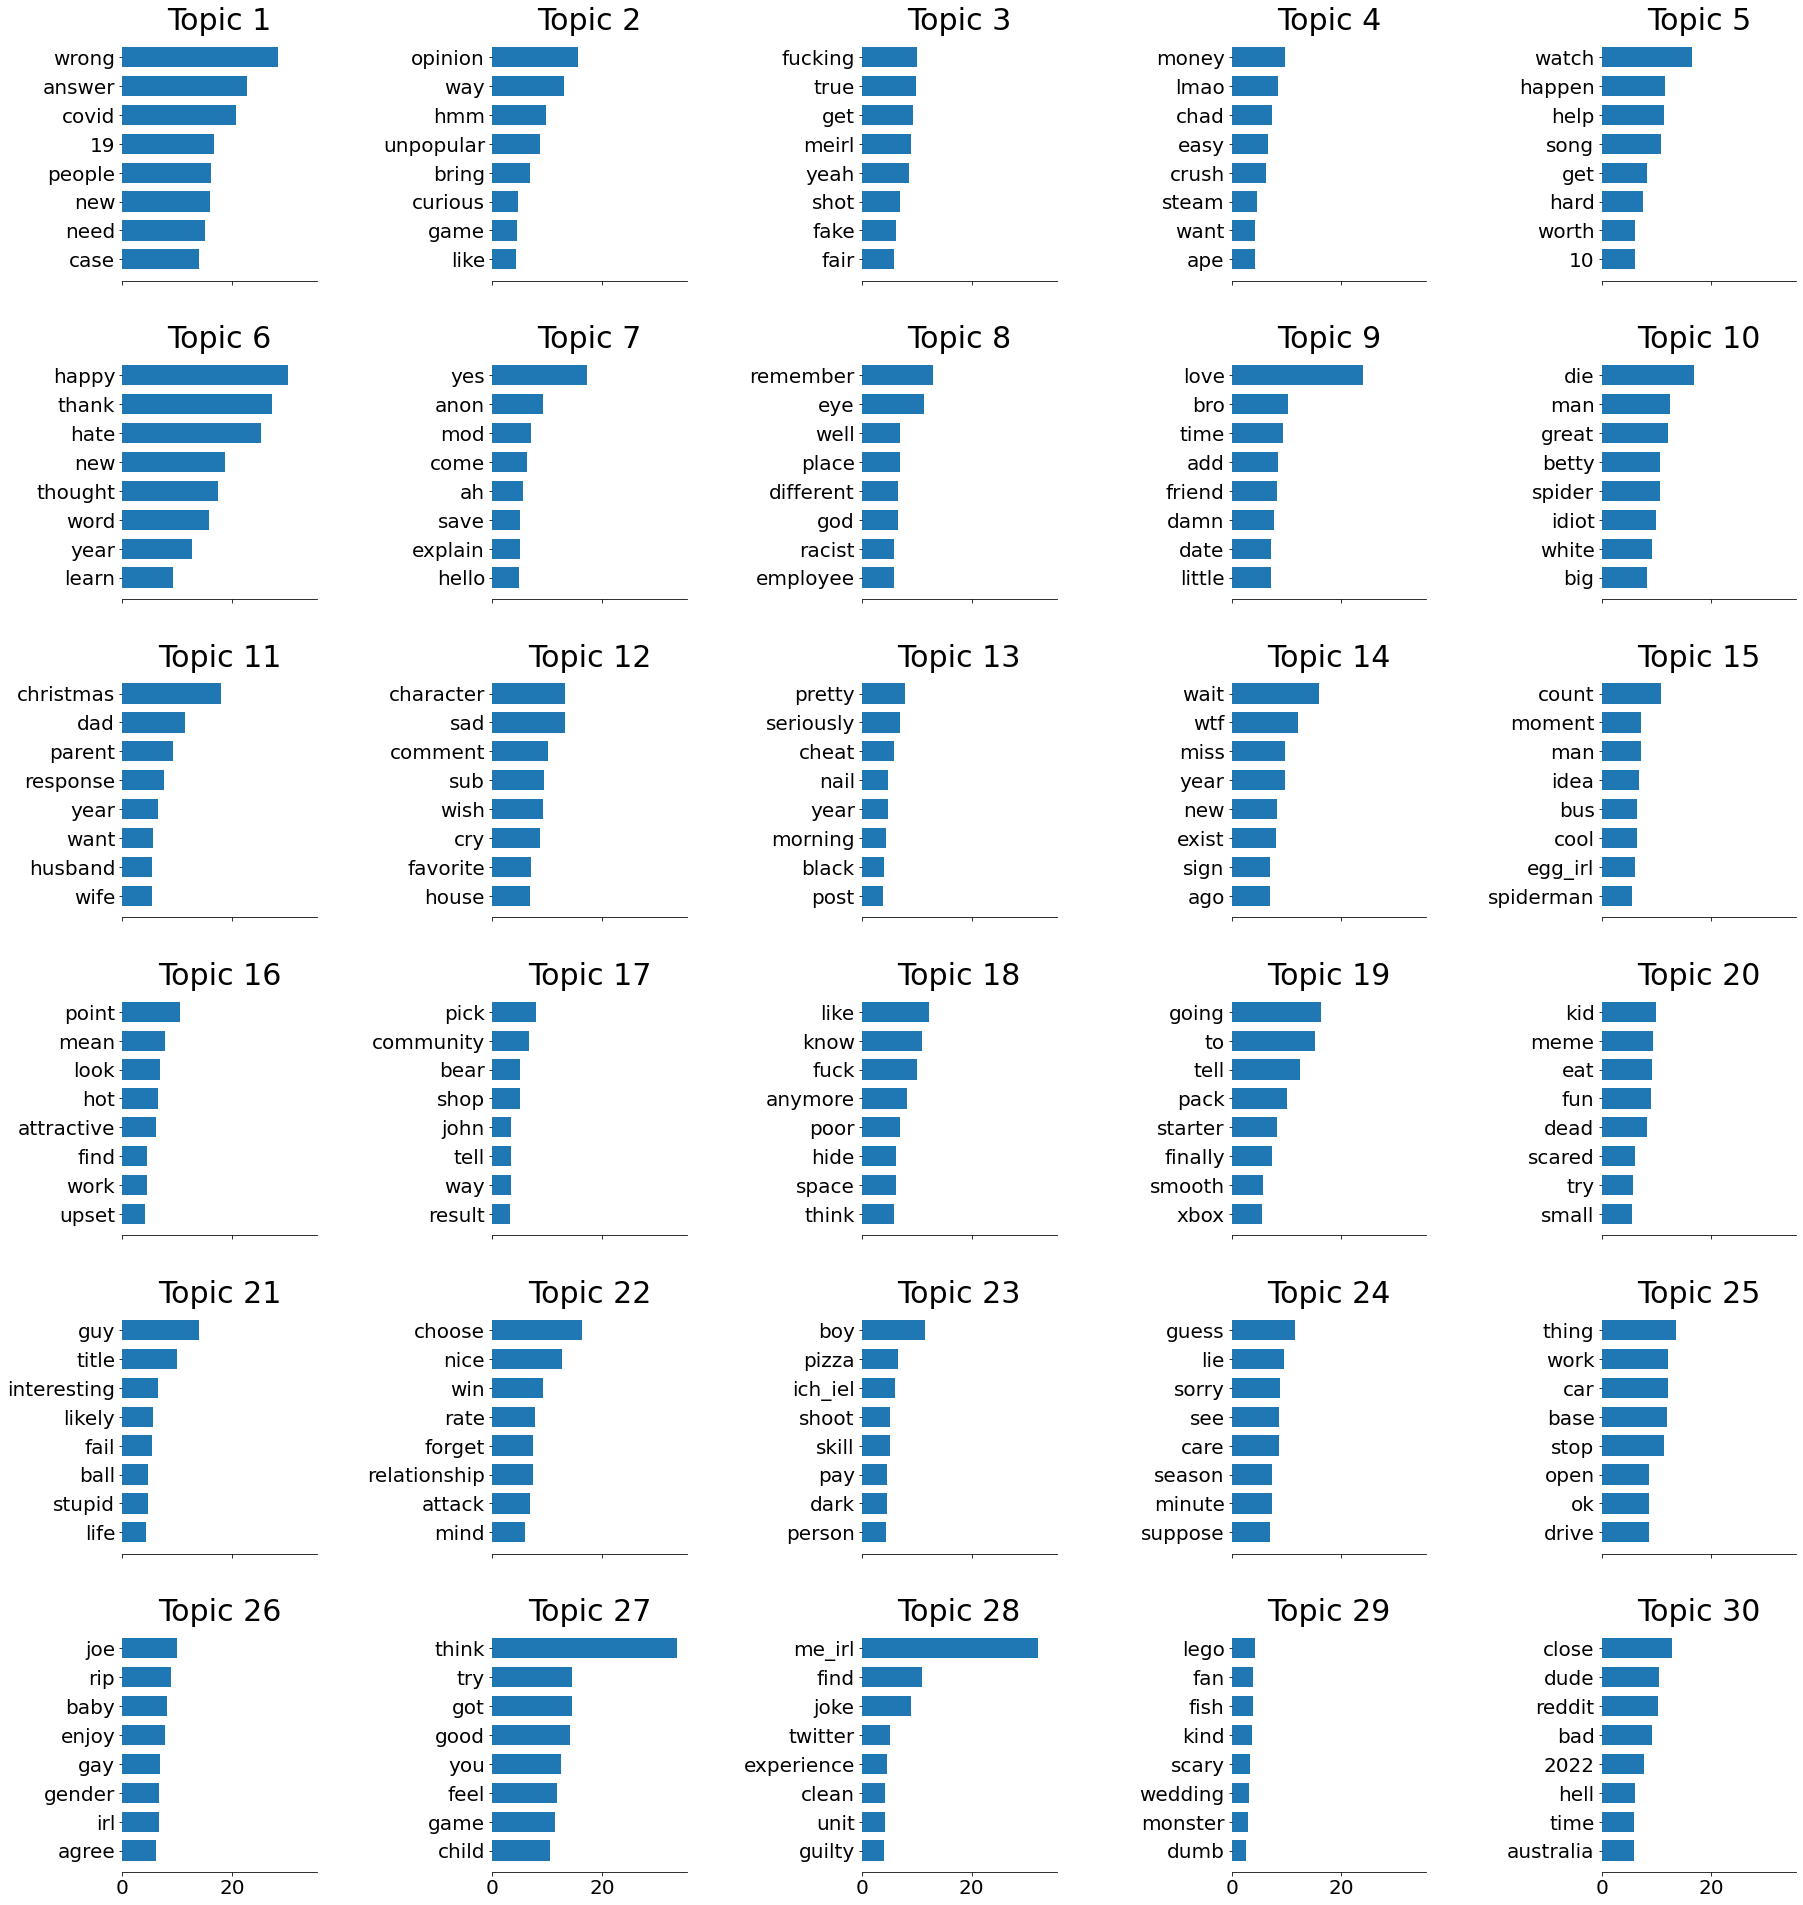

In [14]:
#LDA
lda = LatentDirichletAllocation(n_components=30, learning_decay=0.9)
X_lda = lda.fit(X_tfidf)

def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(6, 5, figsize=(30, 30), sharex=True, facecolor="w")
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f'Topic {topic_idx +1}',
                     fontdict={'fontsize': 30})
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=20)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()
    
#Show topics
n_top_words = 8
feature_names = vectorizer_cv.get_feature_names()
plot_top_words(X_lda, feature_names, n_top_words, '')

# Conclusions
----
Using a compination of TF-IDF and LDA I was able to determine 30 topics categorizations.

 - Topic 2 appears to be discussing sports
 - Topic 3 appears to be discussing the holiday season
 - Topic 4 is discussing the loss of Betty White
 - Elon Musk also made an appearance in Topic 10
 - I am not sure I want to know more about Topic 29.

Using LDA I was able to determine the trending topics but there is more fine tuning to do to better determine the Topics of these more nebulous words. Even with this admittedly crude model we can see trends that definitely occurred in the last few weeks appearing such as the tragic death of Betty White just before her 100th birthday.

While the model could be greatly refined with additional stopwords the fact such diverse topics are successfully being categorized lends credence to the model's predicative capabilities.

In [15]:
threads[threads["subreddit_count"] == 180]

,subreddit,title,num_comments,selftext,subreddit_subscribers,num_crossposts,over_18,parent_whitelist_status,time_on_reddit,text_thread,...,link_thread,video_thread,title_length,text_length,title_words,text_words,creation_time,above_median,subreddit_count,title_tokens
13,shitposting,Cancel straight people,243,None,1008874,0,False,1,11510,0,...,0,0,22,0,3,0,3,1,180,"[cancel, straight, people]"
905,HolUp,…,2082,None,2821926,38,False,2,46182,0,...,0,0,1,0,1,0,2,1,180,[]
911,HolUp,No love,1119,None,2821926,6,False,2,29599,0,...,0,0,7,0,2,0,3,1,180,[love]
935,shitposting,ok,517,None,1009357,7,False,1,43617,0,...,0,1,2,0,1,0,2,1,180,[ok]
1248,HolUp,Here we go again!,733,None,2821928,0,False,2,34434,0,...,0,0,17,0,4,0,2,1,180,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56936,HolUp,Name this mural,1240,None,2849907,4,True,2,44666,0,...,0,0,15,0,3,0,3,1,180,[mural]
56993,shitposting,DIE,291,None,1040848,0,False,1,38526,0,...,0,1,3,0,1,0,3,1,180,[die]
57308,HolUp,Go ahead,519,None,2850233,0,False,2,6960,0,...,0,0,8,0,2,0,1,1,180,[ahead]
57320,HolUp,Guess which sub,736,None,2850233,1,False,2,20930,0,...,0,0,15,0,3,0,1,1,180,"[guess, sub]"
